In [77]:
# Task: merge each feature class with its respective table
#layername_list = fn get_layer_names(input data)
#soils_layers = layers that contain soil in the name
#tables = layers that contain muag in the name
#loop through each soil_layer:
#   find table that matches soil_layer
#   soil_geodataframe = open(soil_layer)
#   table_dataframe = open(table)
#   merge soil and table
#   add new column to hold name and populate it
#   append joined geodataframe to list
#combine all joined geodataframes
#Open watershed data
#intersect combined geodatrame and watershed
#summarize and print results

In [1]:
import os
import pandas as pd
import geopandas as gpd
import fiona

data_file = r'C:\geog5092\lab1\lab1.gpkg' 

#assign the layers to a variable so that you can reuse it, in order to separate the files within the geopackage, you need to set up a condition
files = fiona.listlayers(data_file) 

#list comprehension to extract names from files
list_fc = [x for x in files if 'soil' in x]
list_tables = [y for y in files if 'muaggatt' in y]
#variable assigned that will be used to append the merged files too
merged_list = []

#now we have a list with 9 items and need to match them. #need a nested for loop to iterate elements
#from both lists at the same time. 
#fc equals to each one of the files
#list_fc is the list that includes all of them
#nested loop
#layer is being used as a variable
for fc in list_fc:
    for table in list_tables:
         #use slice to match the last three elements.
        if fc[9:] == table[9:]:
            #now we are opening layers using geopandas and assigning it to a variable 
            df_fc = gpd.read_file(data_file, layer = fc)
            df_tables = gpd.read_file(data_file, layer =  table)
            #we can drop the tables geometry column after we read the file
            #now we can merge using the pandas merge function
            #merged file contains 9 feature classes with joined tables
            merged_file = pd.merge(df_fc, df_tables, left_on='MUSYM',right_on='musym')
            #add new field
            merged_file['mapunitid'] = fc[9:15]
            #append merged_file to the merged_list]
            merged_list.append(merged_file)     
            print(f'Done with {fc}')
#merged_list is a fc that contains all 9 joined feature classes
#now we want to concatenate them into 1 pandas dataframe
df_merged = pd.concat(merged_list) 
df_merged

Done with soilmu_a_co001
Done with soilmu_a_co618
Done with soilmu_a_co641
Done with soilmu_a_co642
Done with soilmu_a_co643
Done with soilmu_a_co644
Done with soilmu_a_co645
Done with soilmu_a_co651
Done with soilmu_a_co653


,SPATIALVER,MUSYM,MUKEY,Shape_Length,Shape_Area,geometry_x,musym,aws025wta,aws0150wta,drclassdcd,geometry_y,mapunitid
0,4.0,AaB,94035,0.010144,0.000004,"MULTIPOLYGON (((-104.42220 39.93400, -104.4248...",AaB,4.15,25.4,Well drained,None,co001
1,4.0,AaB,94035,0.011057,0.000004,"MULTIPOLYGON (((-104.27200 39.78590, -104.2749...",AaB,4.15,25.4,Well drained,None,co001
2,4.0,AaB,94035,0.010620,0.000005,"MULTIPOLYGON (((-104.34210 39.89100, -104.3428...",AaB,4.15,25.4,Well drained,None,co001
3,4.0,AaB,94035,0.015856,0.000013,"MULTIPOLYGON (((-104.28820 39.84590, -104.2850...",AaB,4.15,25.4,Well drained,None,co001
4,4.0,AaB,94035,0.025435,0.000025,"MULTIPOLYGON (((-104.28650 39.83190, -104.2835...",AaB,4.15,25.4,Well drained,None,co001
...,...,...,...,...,...,...,...,...,...,...,...,...
405,3.0,49,512721,0.013377,0.000009,"MULTIPOLYGON (((-105.69790 39.71160, -105.6983...",49,0.31,1.28,None,None,co653
406,3.0,15,512687,0.057632,0.000130,"MULTIPOLYGON (((-105.40050 39.74290, -105.3984...",15,0.73,2.3,Well drained,None,co653
407,3.0,11,512683,0.072986,0.000325,"MULTIPOLYGON (((-105.40660 39.80960, -105.4068...",11,1.27,8.1,Well drained,None,co653
408,3.0,26,512698,0.030541,0.000027,"MULTIPOLYGON (((-105.40340 39.71500, -105.3998...",26,2.29,14.11,Well drained,None,co653


In [4]:
#rename geometry column
df_merged=df_merged.rename(columns = {"geometry_x":"geometry"})
#now open the overlay layer
df_water=gpd.read_file(data_file, layer = 'wbdhu8_lab1')
#now perform the overlay operation
df_intersection = gpd.overlay(df_water,df_merged, how='intersection')
df_intersection

,STATES,NAME,Shape_Length_1,Shape_Area_1,HUC8,SPATIALVER,MUSYM,MUKEY,Shape_Length_2,Shape_Area_2,musym,aws025wta,aws0150wta,drclassdcd,geometry_y,mapunitid,geometry
0,CO,St. Vrain,2.675418,0.268070,10190005,3.0,76,95259,0.029679,0.000053,76,3.1,16.98,Well drained,None,co618,"POLYGON ((-104.87431 40.25347, -104.87413 40.2..."
1,CO,St. Vrain,2.675418,0.268070,10190005,3.0,10,95187,0.063205,0.000079,10,2.88,10.26,Somewhat excessively drained,None,co618,"MULTIPOLYGON (((-104.88050 40.25600, -104.8783..."
2,CO,St. Vrain,2.675418,0.268070,10190005,3.0,61,95243,0.155154,0.000268,61,3.5,5.12,Well drained,None,co618,"POLYGON ((-104.87549 40.27314, -104.87523 40.2..."
3,CO,St. Vrain,2.675418,0.268070,10190005,3.0,75,95258,0.054175,0.000154,75,3.1,16.98,Well drained,None,co618,"POLYGON ((-104.87069 40.20216, -104.87033 40.2..."
4,CO,St. Vrain,2.675418,0.268070,10190005,3.0,11,95188,0.014264,0.000012,11,2.79,14.51,Well drained,None,co618,"POLYGON ((-104.87071 40.20726, -104.87063 40.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,CO,Big Thompson,2.734573,0.228711,10190006,2.0,2705D,762961,0.019985,0.000018,2705D,1.6,2.8,Somewhat excessively drained,None,co645,"POLYGON ((-105.30590 40.28870, -105.30990 40.2..."
4048,CO,Big Thompson,2.734573,0.228711,10190006,2.0,4703D,2108969,0.019245,0.000015,4703D,2.27,4.82,Somewhat excessively drained,None,co645,"POLYGON ((-105.45450 40.23170, -105.45130 40.2..."
4049,CO,Big Thompson,2.734573,0.228711,10190006,2.0,4704B,762980,0.013474,0.000010,4704B,2.27,4.82,Somewhat excessively drained,None,co645,"POLYGON ((-105.47230 40.23860, -105.47510 40.2..."
4050,CO,Big Thompson,2.734573,0.228711,10190006,2.0,W,497612,0.029334,0.000052,W,NA,NA,None,None,co643,"POLYGON ((-105.13930 40.25020, -105.14400 40.2..."


In [6]:
watershed = df_intersection.groupby(['NAME']).count()
print(watershed[['mapunitid']])

              mapunitid
NAME                   
Big Thompson       1979
St. Vrain          2073


<AxesSubplot:>

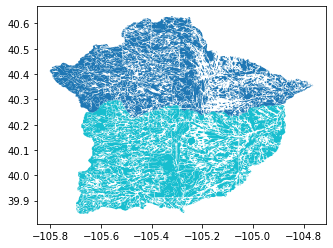

In [82]:
df_intersection.plot(column="NAME")

In [7]:
for idx, row in summarized.iterrows():
    fc_count = row['SPATIALVER']
    print(f'{fc_count} features classes in watershed {idx}')

NameError: name 'summarized' is not defined